In [1]:
from datasets import load_dataset
import gpn.model
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import torch
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModelForSequenceClassification

/accounts/projects/yss/gbenegas/.local/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/accounts/projects/yss/gbenegas/.local/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
d = load_dataset("gonzalobenegas/gxa-sorghum-v1", split="train")

In [3]:
d = d.filter(lambda x: x["chrom"] == "3" and x["start"] == 68_596_290 - 256)
d

Dataset({
    features: ['chrom', 'strand', 'start', 'end', 'seq', 'labels'],
    num_rows: 1
})

In [6]:
psbs = d[0]

In [8]:
psbs["labels"]

[6.938,
 8.409,
 1.065,
 1.131,
 0.833,
 0.55,
 7.004,
 5.784,
 3.412,
 5.899,
 4.543,
 0.0,
 2.037,
 4.485,
 0.0,
 0.47,
 2.037,
 0.36,
 0.182,
 0.0,
 0.0,
 0.0,
 4.547,
 0.659,
 4.585,
 4.263]

In [ ]:
track_idx = 1  # E-MTAB-4021_leaf mesophyll
y_true = psbs["labels"][track_idx]
y_true

8.409

In [9]:
tokenizer = AutoTokenizer.from_pretrained("songlab/tokenizer-dna-mlm")

In [12]:
input_ids = tokenizer(psbs["seq"], return_tensors="pt")["input_ids"]
input_ids.shape

torch.Size([1, 512])

In [11]:
input_ids.shape

torch.Size([1, 512])

In [33]:
def get_loss(checkpoint):
    model = AutoModelForSequenceClassification.from_pretrained(checkpoint).eval()
    with torch.no_grad():
        y_pred = model(input_ids=input_ids).logits[0, track_idx].item()
    return (y_true - y_pred) ** 2

In [ ]:
steps_per_epoch = 265

checkpoints = [
    f"../../results/checkpoints_epoch/GPN_Brassicales/30_epochs/{seed}/checkpoint-{steps_per_epoch * i}"
    for i in range(1, 31)
    for seed in [
        42,
        43,
        44,
        45,
        46,
        #"merged",
    ]
]

res = pd.DataFrame(dict(checkpoint=checkpoints, loss=map(get_loss, tqdm(checkpoints))))
res["epoch"] = res.checkpoint.str.extract(r"checkpoint-(\d+)").astype(int) // steps_per_epoch
res["seed"] = res.checkpoint.str.split("/").str[-2]
res

 18%|████████████████████▎                                                                                            | 27/150 [06:58<48:11, 23.51s/it]

In [ ]:
res

checkpoint       loss  epoch seed
0    ../../results/checkpoints_epoch/GPN_Brassicale...  60.291796      1   42
1    ../../results/checkpoints_epoch/GPN_Brassicale...  52.383779      1   43
2    ../../results/checkpoints_epoch/GPN_Brassicale...  57.131370      1   44
3    ../../results/checkpoints_epoch/GPN_Brassicale...  61.756514      1   45
4    ../../results/checkpoints_epoch/GPN_Brassicale...  56.621897      1   46
..                                                 ...        ...    ...  ...
145  ../../results/checkpoints_epoch/GPN_Brassicale...   0.060376     30   42
146  ../../results/checkpoints_epoch/GPN_Brassicale...   0.770335     30   43
147  ../../results/checkpoints_epoch/GPN_Brassicale...   0.703485     30   44
148  ../../results/checkpoints_epoch/GPN_Brassicale...   0.467087     30   45
149  ../../results/checkpoints_epoch/GPN_Brassicale...   0.370430     30   46

[150 rows x 4 columns]

In [ ]:
res

checkpoint       loss  epoch seed
0    ../../results/checkpoints_epoch/GPN_Brassicale...  60.291796      1   42
1    ../../results/checkpoints_epoch/GPN_Brassicale...  52.383779      1   43
2    ../../results/checkpoints_epoch/GPN_Brassicale...  57.131370      1   44
3    ../../results/checkpoints_epoch/GPN_Brassicale...  61.756514      1   45
4    ../../results/checkpoints_epoch/GPN_Brassicale...  56.621897      1   46
..                                                 ...        ...    ...  ...
145  ../../results/checkpoints_epoch/GPN_Brassicale...   0.060376     30   42
146  ../../results/checkpoints_epoch/GPN_Brassicale...   0.770335     30   43
147  ../../results/checkpoints_epoch/GPN_Brassicale...   0.703485     30   44
148  ../../results/checkpoints_epoch/GPN_Brassicale...   0.467087     30   45
149  ../../results/checkpoints_epoch/GPN_Brassicale...   0.370430     30   46

[150 rows x 4 columns]

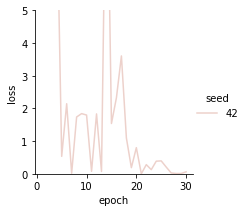

In [5]:
g = sns.relplot(
    kind="line",
    #data=res,
    data=res[res.seed == 42],
    x="epoch",
    y="loss",
    hue="seed",
    height=3,
)
plt.ylim(0, 5)
sns.despine();

In [2]:
#res.to_csv("train_loss_gene.csv", index=False)
res = pd.read_csv("train_loss_gene.csv")
res

checkpoint       loss  epoch  seed
0    ../../results/checkpoints_epoch/GPN_Brassicale...  60.291796      1    42
1    ../../results/checkpoints_epoch/GPN_Brassicale...  52.383779      1    43
2    ../../results/checkpoints_epoch/GPN_Brassicale...  57.131370      1    44
3    ../../results/checkpoints_epoch/GPN_Brassicale...  61.756514      1    45
4    ../../results/checkpoints_epoch/GPN_Brassicale...  56.621897      1    46
..                                                 ...        ...    ...   ...
145  ../../results/checkpoints_epoch/GPN_Brassicale...   0.060376     30    42
146  ../../results/checkpoints_epoch/GPN_Brassicale...   0.770335     30    43
147  ../../results/checkpoints_epoch/GPN_Brassicale...   0.703485     30    44
148  ../../results/checkpoints_epoch/GPN_Brassicale...   0.467087     30    45
149  ../../results/checkpoints_epoch/GPN_Brassicale...   0.370430     30    46

[150 rows x 4 columns]

In [ ]:
res2 = []
for checkpoint in checkpoints:
    ckpt = checkpoint.replace("../../results/", "")
    df = pd.read_csv(f"../../results/experimental_data/metrics/PsbS/{ckpt}.csv")
    df = df[(df.subset=="all") & (df.variant_type == "all")]
    df["checkpoint"] = checkpoint
    res2.append(df)
res2 = pd.concat(res2)

In [ ]:
#res_original = res.copy()

In [ ]:
res = res.merge(res2, how="inner", on="checkpoint")
res

checkpoint       loss  epoch seed  \
0    ../../results/checkpoints_epoch/GPN_Brassicale...  60.291796      1   42   
1    ../../results/checkpoints_epoch/GPN_Brassicale...  52.383779      1   43   
2    ../../results/checkpoints_epoch/GPN_Brassicale...  57.131370      1   44   
3    ../../results/checkpoints_epoch/GPN_Brassicale...  61.756514      1   45   
4    ../../results/checkpoints_epoch/GPN_Brassicale...  56.621897      1   46   
..                                                 ...        ...    ...  ...   
145  ../../results/checkpoints_epoch/GPN_Brassicale...   0.060376     30   42   
146  ../../results/checkpoints_epoch/GPN_Brassicale...   0.770335     30   43   
147  ../../results/checkpoints_epoch/GPN_Brassicale...   0.703485     30   44   
148  ../../results/checkpoints_epoch/GPN_Brassicale...   0.467087     30   45   
149  ../../results/checkpoints_epoch/GPN_Brassicale...   0.370430     30   46   

    subset variant_type  n_variants   Pearson  Spearman  
0      all          all        1127 -0.055947 -0.034061  
1      all          all        1127  0.239139  0.224505  
2      all          all        1127  0.077761  0.077783  
3      all          all        1127 -0.052940 -0.022331  
4      all          all        1127  0.061850  0.101643  
..     ...          ...         ...       ...       ...  
145    all          all        1127  0.328887  0.233912  
146    all          all        1127  0.247201  0.131102  
147    all          all        1127  0.205015  0.178336  
148    all          all        1127  0.191422  0.146777  
149    all          all        1127  0.193243  0.168738  

[150 rows x 9 columns]

In [ ]:
res = res.rename(columns={"Pearson": "Pearson across PsbS variants", "loss": "train loss on PsbS"})
res

checkpoint  train loss on PsbS  \
0    ../../results/checkpoints_epoch/GPN_Brassicale...           60.291796   
1    ../../results/checkpoints_epoch/GPN_Brassicale...           52.383779   
2    ../../results/checkpoints_epoch/GPN_Brassicale...           57.131370   
3    ../../results/checkpoints_epoch/GPN_Brassicale...           61.756514   
4    ../../results/checkpoints_epoch/GPN_Brassicale...           56.621897   
..                                                 ...                 ...   
145  ../../results/checkpoints_epoch/GPN_Brassicale...            0.060376   
146  ../../results/checkpoints_epoch/GPN_Brassicale...            0.770335   
147  ../../results/checkpoints_epoch/GPN_Brassicale...            0.703485   
148  ../../results/checkpoints_epoch/GPN_Brassicale...            0.467087   
149  ../../results/checkpoints_epoch/GPN_Brassicale...            0.370430   

     epoch seed subset variant_type  n_variants  Pearson across PsbS variants  \
0        1   42    all          all        1127                     -0.055947   
1        1   43    all          all        1127                      0.239139   
2        1   44    all          all        1127                      0.077761   
3        1   45    all          all        1127                     -0.052940   
4        1   46    all          all        1127                      0.061850   
..     ...  ...    ...          ...         ...                           ...   
145     30   42    all          all        1127                      0.328887   
146     30   43    all          all        1127                      0.247201   
147     30   44    all          all        1127                      0.205015   
148     30   45    all          all        1127                      0.191422   
149     30   46    all          all        1127                      0.193243   

     Spearman  
0   -0.034061  
1    0.224505  
2    0.077783  
3   -0.022331  
4    0.101643  
..        ...  
145  0.233912  
146  0.131102  
147  0.178336  
148  0.146777  
149  0.168738  

[150 rows x 9 columns]

PearsonRResult(statistic=-0.42553332159034923, pvalue=5.686255096267428e-08)
SignificanceResult(statistic=-0.16595759811547178, pvalue=0.04239204334488932)


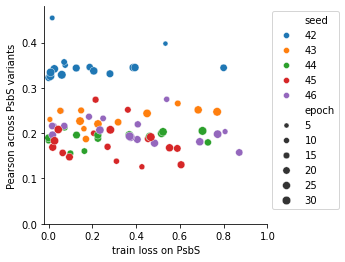

In [ ]:
x = "train loss on PsbS"
y = "Pearson across PsbS variants"
plt.figure(figsize=(4, 4))
g = sns.scatterplot(
    data=res,
    x=x,
    y=y,
    hue="seed",
    size="epoch",
)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
pearson = pearsonr(res[x], res[y])
spearman = spearmanr(res[x], res[y])
print(pearson)
print(spearman)
g.set(
    xlim=(-0.02, 1),
    ylim=0,
    #aspect=1,
)
sns.despine();

In [ ]:
res.groupby("seed")["train loss on PsbS"].mean()

KeyError: 'Column not found: train loss on PsbS'

In [ ]:
res

subset   variant_type  n_variants   Pearson  Spearman  gene  \
0            all            all        1127 -0.055947 -0.034061  PsbS   
1            all   substitution         644  0.079738  0.076040  PsbS   
2            all      insertion         209 -0.232512 -0.218805  PsbS   
3            all       deletion         274  0.008818 -0.022637  PsbS   
4            all  12bp_deletion         136  0.028462  0.039866  PsbS   
..           ...            ...         ...       ...       ...   ...   
20  less_than_50            all          76  0.241828  0.290081  Raf1   
21  less_than_50   substitution          59  0.303741  0.388059  Raf1   
22  less_than_50      insertion          12  0.241065  0.223776  Raf1   
23  less_than_50       deletion           5 -0.397772 -0.300000  Raf1   
24  less_than_50  12bp_deletion           1       NaN       NaN  Raf1   

                                           checkpoint  epoch    seed  \
0   checkpoints_epoch/GPN_Brassicales/30_epochs/42...      1      42   
1   checkpoints_epoch/GPN_Brassicales/30_epochs/42...      1      42   
2   checkpoints_epoch/GPN_Brassicales/30_epochs/42...      1      42   
3   checkpoints_epoch/GPN_Brassicales/30_epochs/42...      1      42   
4   checkpoints_epoch/GPN_Brassicales/30_epochs/42...      1      42   
..                                                ...    ...     ...   
20  checkpoints_epoch/GPN_Brassicales/30_epochs/me...     30  merged   
21  checkpoints_epoch/GPN_Brassicales/30_epochs/me...     30  merged   
22  checkpoints_epoch/GPN_Brassicales/30_epochs/me...     30  merged   
23  checkpoints_epoch/GPN_Brassicales/30_epochs/me...     30  merged   
24  checkpoints_epoch/GPN_Brassicales/30_epochs/me...     30  merged   

      subset2  
0   [-256, 0)  
1   [-256, 0)  
2   [-256, 0)  
3   [-256, 0)  
4   [-256, 0)  
..        ...  
20   [-50, 0)  
21   [-50, 0)  
22   [-50, 0)  
23   [-50, 0)  
24   [-50, 0)  

[13500 rows x 10 columns]